In [1]:
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import seaborn as sns


In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

In [3]:
df = pd.read_csv("carbon.csv")
df

,DATE_TIME,IBF_ASH,IBF_MOISTURE,IBF_CRI,IBF_CSR,AMS_IBF,IBF GCQI,ORE_RATE,SINTER_RATE,COKE_RATE,PYROXINITE_RATE,QUARTZ_RATE,LIMESTONE_RATE,COAL_RATE,SLAG_RATE,K2O_IN_SLAG,K2O_IN,K2O_OUT,K2O_FLUSHING,PELLET_RATE,CORR_PRODUCTION,CORR_PI,CORR_CARBON_RATE,SINTER_PERC,CORR_NC_RATE,SLAGRATE,K2O Input,K2O slag,K2O Flushing,0,SINTER_RATE.1,QUARTZ_RATE.1,PYROXINITE_RATE.1,LIMESTONE_RATE.1,HMT,OXYGEN,DOLOMITE_RATE,Total Agglomerate,OVERALL MOIST LOAD (KG/THM),DUST FROM DUST CATCHER (Tons),SLURRY FROM PRESS FILTER,CAST_DURATION,SPEED,DELTA_HM_TEMP,DELTA_HM_WT,BGV,CLT,MVAL,FVAL,DCI,TFR,REL_DEADMAN_TEMP,MODIFIED_ALPHA_BY_BETA,ORE_BY_COKE_RADAR1,ORE_BY_COKE_RADAR2,C,SI,S,TI,CAO_SIO2,CAOMGOSIO2,HM_TEMP,Slag Fludity Index,CENTRE COKE,PERC_CENTRE_COKE,COLD_BLAST_HUMIDITY,ETA_CO,LOWER_K,MIDDLE_K,UPPER_K,O2_ENRICHMENT,O2_FLOW,PERC_COKE_FINES_PRV_DAY,PERC_ORE_FINES_PRV_DAY,PERC_PELLET_FINES_PRV_DAY,PERC_SINTER_FINES_PRV_DAY,RAFT,TG_VOLUME,UPTAKE_TEMP_AVG,UPTAKE_TEMP_MAX_MIN,AVG. SKIN_FLOW_TEMP,COLD_BLAST_FLOW_RATE,Tuy Vel (m/s),Top Gas Pressure,Delta P,HOT_BLAST_TEMP,BFG_CO,BFG_CO2,BFG_H2,BFG_N2,AVG (A6&B6),AVERAGE_ROOTHEIGHT,CIRCUIT_3_HL_MJ_H,TOTAL_HEAT_LOSS_GJ_H,MEAN_SIZE,CORR_COKE_RATE,CORR_COAL_RATE
0,1-Apr-17,16.27,3.10,26.00,66.20,44.57,138.26,209,807,305,2,22,0,206,310,0.48,1.55,1.48,95.7,597,9557,2.96,426,50,18,310,1.49,1.42,95.3,24,807,22,2,0,1516,943,0,87.0,24,54.0,187,1475,5.96,7,249,8182,186,16.5,2.68,259.0,0.87,969,1.27,1.79,1.74,4.57,0.67,0.049,0.062,1.03,1.34,1516,130,4.97,24.47,29.1,50.79,1.53,0.77,0.55,7.72,32502,30.3,1.7,2.3,18.9,2110,517676,119,17,156,300054,185,150119.37,-150000.68,1229,24.9,25.7,4.1,45.2,90,6.76,54653,95,11.76,303,205
1,2-Apr-17,15.78,3.27,26.00,66.50,44.98,137.71,206,715,307,10,0,0,207,303,0.57,1.78,1.74,97.5,663,9369,2.90,433,45,14,303,1.45,1.67,115.8,43,715,0,10,0,1516,856,33,87.0,28,34.0,99,1485,6.27,18,160,7930,193,16.4,2.61,285.0,0.86,980,1.30,1.41,1.39,4.53,0.66,0.040,0.070,1.02,1.34,1516,127,5.17,24.75,23.5,49.89,1.69,0.84,0.46,8.49,34705,30.6,1.9,0.9,20.2,2166,503917,97,13,95,288102,178,144139.73,-144042.67,1239,25.6,25.5,4.3,44.6,82,6.76,86156,122,11.96,308,208
2,3-Apr-17,15.51,2.73,24.90,68.10,45.58,138.97,220,753,295,8,10,0,217,296,0.42,1.34,1.25,93.6,596,8532,2.64,437,48,16,296,1.46,1.29,88.4,19,753,10,8,0,1499,951,0,86.0,23,38.0,99,1530,5.39,31,199,7407,188,14.6,2.97,211.0,0.82,776,1.33,1.20,1.38,4.57,0.74,0.034,0.077,1.10,1.34,1499,86,4.99,24.58,25.0,50.98,1.43,0.84,0.52,8.73,32620,30.2,2.6,3.4,17.8,2081,462148,115,17,152,267074,165,133619.67,-133504.91,1181,24.8,25.8,4.5,45.0,105,4.67,79531,117,11.86,301,221
3,4-Apr-17,14.97,2.73,24.90,67.30,46.40,139.46,225,721,319,15,10,0,203,316,0.53,1.84,1.69,91.5,659,9149,2.83,440,45,18,317,1.50,1.71,114.1,24,721,10,15,0,1508,994,0,86.0,27,88.0,162,1675,5.92,18,273,8018,197,16.7,2.68,244.0,0.85,990,1.29,1.20,1.62,4.54,0.75,0.042,0.073,1.07,1.34,1508,110,5.12,24.52,27.0,49.52,1.62,0.82,0.41,8.22,33999,31.1,2.5,1.1,18.4,2169,508113,100,12,129,292602,181,146391.25,-146291.31,1239,25.7,25.2,4.2,44.9,73,3.84,81384,120,11.82,321,204
4,6-Apr-17,14.98,3.05,26.50,64.80,43.65,97.95,64,833,354,0,14,0,158,344,0.47,1.38,1.60,116.5,704,8909,2.76,436,52,19,344,1.58,1.61,102.0,41,833,14,0,0,1507,714,27,96.0,16,112.0,132,1525,5.72,8,214,8236,216,18.1,2.54,245.0,0.82,1023,1.18,0.85,1.67,4.61,0.55,0.046,0.051,1.05,1.34,1507,112,5.23,23.76,12.0,50.00,1.61,0.70,0.52,4.57,20855,31.6,2.9,0.7,13.1,2207,534845,128,27,162,340064,210,170136.87,-170008.99,1155,23.6,23.6,3.1,49.6,94,5.96,67878,105,11.99,357,160
5,8-Apr-17,15.16,3.47,25.30,66.19,45.69,138.89,215,736,348,26,6,0,202,311,0.48,1.47,1.50,102.1,583,8739,2.71,472,48,13,311,1.60,0.00,0.0,32,736,6,26,0,1497,842,0,86.0,27,35.0,99,1625,5.20,12,1163,7806,202,16.0,2.61,252.0,0.77,982,1.31,1.13,1.20,4.53,0.58,0.049,0.058,1.04,1.34,1497,110,7.70,26.65,28.8,49.60,1.71,0.73,0.47,7.87,31587,29.9,5.8,3.4,18.3,2145,492619,130,22,151,286033,177,143104.97,-142974.91,1242,25.3,24.9,4.5,45.3,111,5.96,78346,116,12.00,359,208
6,9-Apr-17,15.11,

In [4]:
df = df.drop(["DATE_TIME", "COKE_RATE", "COAL_RATE", ], axis=1)
df

,IBF_ASH,IBF_MOISTURE,IBF_CRI,IBF_CSR,AMS_IBF,IBF GCQI,ORE_RATE,SINTER_RATE,PYROXINITE_RATE,QUARTZ_RATE,LIMESTONE_RATE,SLAG_RATE,K2O_IN_SLAG,K2O_IN,K2O_OUT,K2O_FLUSHING,PELLET_RATE,CORR_PRODUCTION,CORR_PI,CORR_CARBON_RATE,SINTER_PERC,CORR_NC_RATE,SLAGRATE,K2O Input,K2O slag,K2O Flushing,0,SINTER_RATE.1,QUARTZ_RATE.1,PYROXINITE_RATE.1,LIMESTONE_RATE.1,HMT,OXYGEN,DOLOMITE_RATE,Total Agglomerate,OVERALL MOIST LOAD (KG/THM),DUST FROM DUST CATCHER (Tons),SLURRY FROM PRESS FILTER,CAST_DURATION,SPEED,DELTA_HM_TEMP,DELTA_HM_WT,BGV,CLT,MVAL,FVAL,DCI,TFR,REL_DEADMAN_TEMP,MODIFIED_ALPHA_BY_BETA,ORE_BY_COKE_RADAR1,ORE_BY_COKE_RADAR2,C,SI,S,TI,CAO_SIO2,CAOMGOSIO2,HM_TEMP,Slag Fludity Index,CENTRE COKE,PERC_CENTRE_COKE,COLD_BLAST_HUMIDITY,ETA_CO,LOWER_K,MIDDLE_K,UPPER_K,O2_ENRICHMENT,O2_FLOW,PERC_COKE_FINES_PRV_DAY,PERC_ORE_FINES_PRV_DAY,PERC_PELLET_FINES_PRV_DAY,PERC_SINTER_FINES_PRV_DAY,RAFT,TG_VOLUME,UPTAKE_TEMP_AVG,UPTAKE_TEMP_MAX_MIN,AVG. SKIN_FLOW_TEMP,COLD_BLAST_FLOW_RATE,Tuy Vel (m/s),Top Gas Pressure,Delta P,HOT_BLAST_TEMP,BFG_CO,BFG_CO2,BFG_H2,BFG_N2,AVG (A6&B6),AVERAGE_ROOTHEIGHT,CIRCUIT_3_HL_MJ_H,TOTAL_HEAT_LOSS_GJ_H,MEAN_SIZE,CORR_COKE_RATE,CORR_COAL_RATE
0,16.27,3.10,26.00,66.20,44.57,138.26,209,807,2,22,0,310,0.48,1.55,1.48,95.7,597,9557,2.96,426,50,18,310,1.49,1.42,95.3,24,807,22,2,0,1516,943,0,87.0,24,54.0,187,1475,5.96,7,249,8182,186,16.5,2.68,259.0,0.87,969,1.27,1.79,1.74,4.57,0.67,0.049,0.062,1.03,1.34,1516,130,4.97,24.47,29.1,50.79,1.53,0.77,0.55,7.72,32502,30.3,1.7,2.3,18.9,2110,517676,119,17,156,300054,185,150119.37,-150000.68,1229,24.9,25.7,4.1,45.2,90,6.76,54653,95,11.76,303,205
1,15.78,3.27,26.00,66.50,44.98,137.71,206,715,10,0,0,303,0.57,1.78,1.74,97.5,663,9369,2.90,433,45,14,303,1.45,1.67,115.8,43,715,0,10,0,1516,856,33,87.0,28,34.0,99,1485,6.27,18,160,7930,193,16.4,2.61,285.0,0.86,980,1.30,1.41,1.39,4.53,0.66,0.040,0.070,1.02,1.34,1516,127,5.17,24.75,23.5,49.89,1.69,0.84,0.46,8.49,34705,30.6,1.9,0.9,20.2,2166,503917,97,13,95,288102,178,144139.73,-144042.67,1239,25.6,25.5,4.3,44.6,82,6.76,86156,122,11.96,308,208
2,15.51,2.73,24.90,68.10,45.58,138.97,220,753,8,10,0,296,0.42,1.34,1.25,93.6,596,8532,2.64,437,48,16,296,1.46,1.29,88.4,19,753,10,8,0,1499,951,0,86.0,23,38.0,99,1530,5.39,31,199,7407,188,14.6,2.97,211.0,0.82,776,1.33,1.20,1.38,4.57,0.74,0.034,0.077,1.10,1.34,1499,86,4.99,24.58,25.0,50.98,1.43,0.84,0.52,8.73,32620,30.2,2.6,3.4,17.8,2081,462148,115,17,152,267074,165,133619.67,-133504.91,1181,24.8,25.8,4.5,45.0,105,4.67,79531,117,11.86,301,221
3,14.97,2.73,24.90,67.30,46.40,139.46,225,721,15,10,0,316,0.53,1.84,1.69,91.5,659,9149,2.83,440,45,18,317,1.50,1.71,114.1,24,721,10,15,0,1508,994,0,86.0,27,88.0,162,1675,5.92,18,273,8018,197,16.7,2.68,244.0,0.85,990,1.29,1.20,1.62,4.54,0.75,0.042,0.073,1.07,1.34,1508,110,5.12,24.52,27.0,49.52,1.62,0.82,0.41,8.22,33999,31.1,2.5,1.1,18.4,2169,508113,100,12,129,292602,181,146391.25,-146291.31,1239,25.7,25.2,4.2,44.9,73,3.84,81384,120,11.82,321,204
4,14.98,3.05,26.50,64.80,43.65,97.95,64,833,0,14,0,344,0.47,1.38,1.60,116.5,704,8909,2.76,436,52,19,344,1.58,1.61,102.0,41,833,14,0,0,1507,714,27,96.0,16,112.0,132,1525,5.72,8,214,8236,216,18.1,2.54,245.0,0.82,1023,1.18,0.85,1.67,4.61,0.55,0.046,0.051,1.05,1.34,1507,112,5.23,23.76,12.0,50.00,1.61,0.70,0.52,4.57,20855,31.6,2.9,0.7,13.1,2207,534845,128,27,162,340064,210,170136.87,-170008.99,1155,23.6,23.6,3.1,49.6,94,5.96,67878,105,11.99,357,160
5,15.16,3.47,25.30,66.19,45.69,138.89,215,736,26,6,0,311,0.48,1.47,1.50,102.1,583,8739,2.71,472,48,13,311,1.60,0.00,0.0,32,736,6,26,0,1497,842,0,86.0,27,35.0,99,1625,5.20,12,1163,7806,202,16.0,2.61,252.0,0.77,982,1.31,1.13,1.20,4.53,0.58,0.049,0.058,1.04,1.34,1497,110,7.70,26.65,28.8,49.60,1.71,0.73,0.47,7.87,31587,29.9,5.8,3.4,18.3,2145,492619,130,22,151,286033,177,143104.97,-142974.91,1242,25.3,24.9,4.5,45.3,111,5.96,78346,116,12.00,359,208
6,15.11,3.17,30.90,61.80,45.55,129.03,65,849,19,1,0,332,0.44,1.56,1.45,93.4,718,9022,2.79,431,52,19,332,1.58,1.71,108.5,29,849,1,19,0,1500,690,10,96.

# Prediction of coal rate

In [5]:
df.isnull().sum()

IBF_ASH                          0
IBF_MOISTURE                     0
IBF_CRI                          0
IBF_CSR                          0
AMS_IBF                          0
IBF GCQI                         0
ORE_RATE                         0
SINTER_RATE                      0
PYROXINITE_RATE                  0
QUARTZ_RATE                      0
LIMESTONE_RATE                   0
SLAG_RATE                        0
K2O_IN_SLAG                      0
K2O_IN                           0
K2O_OUT                          0
K2O_FLUSHING                     0
PELLET_RATE                      0
CORR_PRODUCTION                  0
CORR_PI                          0
CORR_CARBON_RATE                 0
SINTER_PERC                      0
CORR_NC_RATE                     0
SLAGRATE                         0
K2O Input                        0
K2O slag                         2
K2O Flushing                     2
0                                0
SINTER_RATE.1                    0
QUARTZ_RATE.1       

In [6]:
df = df.dropna(subset=["DCI"])
df = df.dropna(subset=["CENTRE COKE"])
df = df.dropna(subset=["PERC_PELLET_FINES_PRV_DAY"])
df = df.dropna(subset=["PERC_SINTER_FINES_PRV_DAY"])
df = df.dropna(subset=["K2O slag"])

In [7]:
# Correlation Matrix

corr_matrix = df.corr()
corr_matrix

,IBF_ASH,IBF_MOISTURE,IBF_CRI,IBF_CSR,AMS_IBF,IBF GCQI,ORE_RATE,SINTER_RATE,PYROXINITE_RATE,QUARTZ_RATE,LIMESTONE_RATE,SLAG_RATE,K2O_IN_SLAG,K2O_IN,K2O_OUT,K2O_FLUSHING,PELLET_RATE,CORR_PRODUCTION,CORR_PI,CORR_CARBON_RATE,SINTER_PERC,CORR_NC_RATE,SLAGRATE,K2O Input,K2O slag,K2O Flushing,0,SINTER_RATE.1,QUARTZ_RATE.1,PYROXINITE_RATE.1,LIMESTONE_RATE.1,HMT,OXYGEN,DOLOMITE_RATE,Total Agglomerate,OVERALL MOIST LOAD (KG/THM),DUST FROM DUST CATCHER (Tons),SLURRY FROM PRESS FILTER,CAST_DURATION,SPEED,DELTA_HM_TEMP,DELTA_HM_WT,BGV,CLT,MVAL,FVAL,DCI,TFR,REL_DEADMAN_TEMP,MODIFIED_ALPHA_BY_BETA,ORE_BY_COKE_RADAR1,ORE_BY_COKE_RADAR2,C,SI,S,TI,CAO_SIO2,CAOMGOSIO2,HM_TEMP,Slag Fludity Index,CENTRE COKE,PERC_CENTRE_COKE,COLD_BLAST_HUMIDITY,ETA_CO,LOWER_K,MIDDLE_K,UPPER_K,O2_ENRICHMENT,O2_FLOW,PERC_COKE_FINES_PRV_DAY,PERC_ORE_FINES_PRV_DAY,PERC_PELLET_FINES_PRV_DAY,PERC_SINTER_FINES_PRV_DAY,RAFT,TG_VOLUME,UPTAKE_TEMP_AVG,UPTAKE_TEMP_MAX_MIN,AVG. SKIN_FLOW_TEMP,COLD_BLAST_FLOW_RATE,Tuy Vel (m/s),Top Gas Pressure,Delta P,HOT_BLAST_TEMP,BFG_CO,BFG_CO2,BFG_H2,BFG_N2,AVG (A6&B6),AVERAGE_ROOTHEIGHT,CIRCUIT_3_HL_MJ_H,TOTAL_HEAT_LOSS_GJ_H,MEAN_SIZE,CORR_COKE_RATE,CORR_COAL_RATE
IBF_ASH,1.000000,0.023038,-0.237892,0.116928,0.032170,0.188822,0.185014,-0.090876,-0.012587,-0.038526,0.021788,-0.162964,-0.017444,-0.036850,-0.087717,-0.051726,-0.103742,0.059941,0.059747,-0.026688,-0.093248,0.003338,-0.162053,-0.006756,-0.053520,-0.060648,-0.015248,-0.090876,-0.038517,-0.010288,0.021788,0.037388,0.063990,-0.002297,-0.186442,0.164385,-0.117487,-0.008706,0.128032,-0.008948,-0.026561,-0.115634,0.015502,-0.047455,-0.052511,0.061816,-0.018390,0.040178,0.018754,-0.063762,0.099406,-0.105212,-0.093407,0.165228,-0.035700,0.197866,0.034434,-0.089205,0.037388,-0.014268,-0.078153,0.103347,0.220294,0.004670,-0.034291,0.015407,-0.075263,0.161194,0.150945,-0.028291,-0.005960,0.048704,0.153966,-0.118720,-0.094890,-0.074398,-0.066839,-0.040409,-0.169177,-0.166743,-0.169179,0.169133,0.211560,0.065767,0.056249,0.233608,-0.100186,0.014934,0.022645,0.057384,0.054223,-0.122403,-0.036950,0.055224
IBF_MOISTURE,0.023038,1.000000,-0.016936,0.035070,-0.180750,0.020877,-0.008276,0.023844,0.009824,0.029957,-0.033486,0.043247,-0.026755,0.143324,-0.010956,-0.129495,-0.011933,-0.076074,-0.076344,0.146981,0.021934,0.004156,0.040657,0.145380,-0.031661,-0.075169,0.035980,0.023844,0.029595,0.009941,-0.033486,-0.031976,-0.037816,0.030383,0.007959,0.010645,0.003706,0.013190,0.021469,-0.005061,-0.031687,-0.045728,-0.002091,0.116839,0.078305,-0.038830,-0.117180,-0.086459,0.084093,0.036497,0.091008,-0.037993,0.086544,0.020618,-0.007036,0.002993,-0.011826,-0.105342,-0.031976,-0.038374,0.076174,-0.000187,0.011727,-0.134873,-0.027262,0.049137,0.032184,-0.112506,-0.117541,0.030149,0.009941,-0.040666,-0.079770,0.020444,-0.021254,0.084500,0.110423,-0.005948,0.085291,0.087828,0.085289,-0.085160,-0.090013,-0.021529,-0.129592,-0.018258,0.087196,0.068917,-0.038452,0.051097,0.045235,0.083939,0.146341,-0.083444
IBF_CRI,-0.237892,-0.016936,1.000000,-0.784701,-0.033867,-0.591173,-0.857257,0.256003,0.022889,0.069694,-0.096767,0.444878,-0.047412,0.035606,0.137581,0.121398,0.494602,-0.183389,-0.184559,0.023258,0.337512,0.120667,0.444814,-0.040139,0.136791,0.151117,-0.036858,0.256003,0.070660,0.026708,-0.096767,-0.203075,-0.252171,-0.062810,0.855548,-0.638363,0.134232,0.057240,-0.122694,0.068795,-0.006182,0.057892,-0.206892,0.082806,0.178710,-0.127943,0.066794,-0.036803,-0.242236,0.129907,-0.044402,0.017276,0.008012,-0.269988,-0.041816,-0.363745,-0.205219,-0.049222,-0.203075,0.038750,0.014701,-0.154861,-0.465486,0.293970,0.064526,0.125793,0.327339,-0.383019,-0.386130,0.163069,-0.023419,-0.103402,-0.414560,0.277331,0.195177,0.226269,0.390766,0.236609,0.262405,0.261754,0.262402,-0.262085,-0.467956,-0.164873,0.118291,-0.503297,0.090641,0.007031,0.017526,0.129542,0.150053,0.021425,0.133667,-0.140656
IBF_CSR,0.116928,0.035070,-0.784701,1.000000,-0.033526,0.593623,0.833291,-0.207653,-0.055716,0.018838,0.129092,-0.387202,0

In [8]:
# Feature Selection


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
X = df.iloc[:,0:-2]  #independent columns
Y = df.iloc[:,-1]    #target column 
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                   Specs       Score
43                   CLT  648.568640
23             K2O Input  529.686301
67         O2_ENRICHMENT  217.234289
68               O2_FLOW  211.590402
44                  MVAL  197.026853
73                  RAFT  146.388519
21          CORR_NC_RATE  101.095007
78  COLD_BLAST_FLOW_RATE   91.113132
80      Top Gas Pressure   91.112930
81               Delta P   91.094218


In [9]:
x = df[["CLT", "K2O Input", "O2_ENRICHMENT", "O2_FLOW", "MVAL", "RAFT", "CORR_NC_RATE", "COLD_BLAST_FLOW_RATE", "Top Gas Pressure" ]]
y = df[["CORR_COAL_RATE"]]

In [10]:
# Initialise the Scaler 
scaler = StandardScaler() 
x = scaler.fit_transform(x)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [11]:
# Splitting the Data set in training and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

# Multiple Linear Regression

In [12]:
# Fitting multiple linear regression to the training set 
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
#R-Square value
    
coefficient_of_dermination = r2_score(y_test, y_pred)
print("Score: {}".format(coefficient_of_dermination))


Score: 0.8667849759655069


In [13]:
print(model.intercept_)
print(model.coef_)

[201.73094993]
[[-8.52212131e+00 -1.61661420e+00  5.23193723e+00 -1.50463135e+00
  -5.79961489e+00  2.29565622e-01 -3.42031123e+00 -1.10465128e+03
   1.10788241e+03]]


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


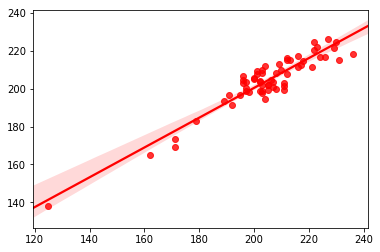

In [14]:
# Original vs Predicted
y_test = y_test.values.reshape(62,)
y_pred = y_pred.reshape(62,)
sns.regplot(y_test, y_pred, color = 'red') 
plt.savefig('mlr.jpg')


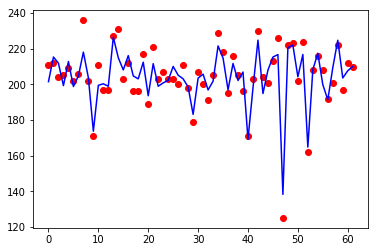

In [15]:
x1 = np.arange(0,62)
plt.scatter(x1,y_test, color="red")
plt.plot(x1,y_pred, color="blue")
plt.savefig('mlrscat.jpg')


In [16]:
y_pred_all = model.predict(x)
df["y_pred_all"] = y_pred_all
print(df.iloc[:,-2:])


     CORR_COAL_RATE  y_pred_all
0               205  207.821067
1               208  209.646599
2               221  222.150930
3               204  196.685758
4               160  164.331863
5               208  199.842715
6               155  163.025238
7               189  193.590366
9               125  138.181739
10              198  208.089503
11              195  193.616798
12              207  211.197461
13              200  205.137919
14              211  208.869376
15              199  197.175901
16              203  198.933191
17              231  218.621240
18              213  215.330439
19              217  213.590626
20              167  162.268064
21              198  207.207272
22              194  201.794469
23              206  204.720824
24              193  200.903522
25              152  146.592159
26              218  212.931092
27              203  210.063561
28              207  196.132763
29              183  181.327305
31              213  205.305292
32      

In [17]:
print ("Coefficient of Determination : ",r2_score(df['CORR_COAL_RATE'],y_pred_all))

Coefficient of Determination :  0.8407259461824677


# Decision Tree

In [18]:
from sklearn import tree

modelDT = tree.DecisionTreeRegressor(max_depth=10)
modelDT.fit(x_train,y_train)
y_pred = modelDT.predict(x_test)
print ("Coefficient of Determination : ",r2_score(y_test,y_pred))

Coefficient of Determination :  0.670743487662633


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


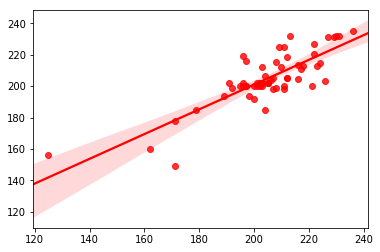

In [19]:
# Original vs Predicted
sns.regplot(y_test, y_pred, color = 'red') 
plt.savefig('dt.jpg')


# Random Forest

In [20]:
from sklearn.ensemble import RandomForestRegressor

modelRF = RandomForestRegressor(n_estimators = 10)
modelRF.fit(x_train,y_train)
y_pred = modelRF.predict(x_test)
print ("Coefficient of Determination : ",r2_score(y_test,y_pred))

Coefficient of Determination :  0.8703695140006438


/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


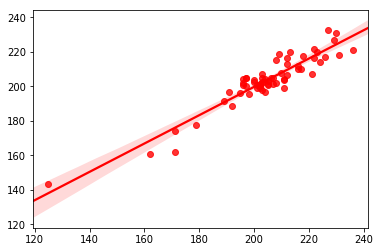

In [21]:
# Original vs Predicted
sns.regplot(y_test, y_pred, color = 'red') 
plt.savefig('rf.jpg')


# K nearest Neighbors

In [22]:
from sklearn.neighbors import KNeighborsRegressor

# Create KNN regressor
knn = KNeighborsRegressor(n_neighbors = 50)
# Fit the classifier to the data
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
coefficient_of_dermination = r2_score(y_test, y_pred)
print("R-Squared Value: {}".format(coefficient_of_dermination))

R-Squared Value: 0.6051067131852806


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


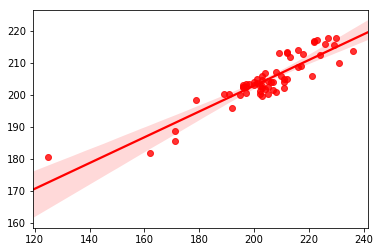

In [23]:
# Original vs Predicted
y_test = y_test.reshape(62,)
y_pred = y_pred.reshape(62,)
sns.regplot(y_test, y_pred, color = 'red')  
plt.savefig('knn.jpg')


# SVR

In [24]:
from sklearn.svm import SVR

modelsvr = SVR(kernel="linear")
modelsvr.fit(x_train,y_train)
y_pred = modelsvr.predict(x_test)
print ("Coefficient of Determination : ",r2_score(y_test,y_pred))



Coefficient of Determination :  0.8361744454072375


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


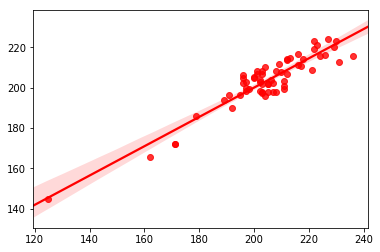

In [25]:
# Original vs Predicted
y_test = y_test.reshape(62,)
y_pred = y_pred.reshape(62,)
sns.regplot(y_test, y_pred, color = 'red')  
plt.savefig('svr.jpg')


In [26]:
y_test.shape

(62,)

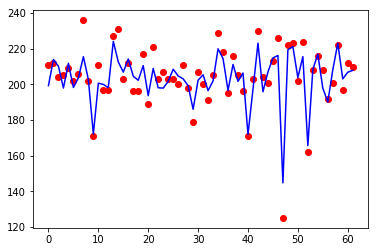

In [27]:
x1 = np.arange(0,62)
plt.scatter(x1,y_test, color="red")
plt.plot(x1,y_pred, color="blue")